# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import requests
import random
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from api_keys import weather_api_key
from citipy import citipy
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
city_list = []
pullsize = 1000

# Generating random Lat/Long coordinates to populate cities into list
for x in range(0,pullsize):
    coord1 = np.random.uniform(low=-90.000000, high=90.000000)
    coord2 = np.random.uniform(low=-180.000000, high=180.000000)
    city = citipy.nearest_city(coord1, coord2)
    city_list.append(city.city_name)
# Setting up initial DataFrame
Collected_df = pd.DataFrame(columns = ["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"])
Collected_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
str(city_list)

"['albany', 'doctor arroyo', 'avarua', 'kulhudhuffushi', 'cape town', 'butaritari', 'mataura', 'havre-saint-pierre', 'rikitea', 'padang', 'mount gambier', 'nikolskoye', 'bethel', 'rikitea', 'cherskiy', 'dikson', 'saint-philippe', 'grindavik', 'pekan', 'punta arenas', 'plotnikovo', 'mar del plata', 'ribeira grande', 'khatanga', 'kiama', 'tumannyy', 'sitka', 'ixtapa', 'busselton', 'dikson', 'russas', 'butaritari', 'mount isa', 'pacific grove', 'busselton', 'mokhotlong', 'hermanus', 'sola', 'rikitea', 'bhag', 'elizabeth city', 'pevek', 'san luis', 'rikitea', 'halalo', 'albany', 'ushuaia', 'puerto ayora', 'soke', 'itarema', 'the valley', 'bambous virieux', 'hofn', 'bluff', 'bluff', 'valdivia', 'turukhansk', 'bubaque', 'rikitea', 'jamestown', 'lasa', 'nioro', 'saint-philippe', 'kjustendil', 'taolanaro', 'albany', 'vaini', 'ushuaia', 'ribeira grande', 'san carlos de bariloche', 'tiksi', 'ilulissat', 'mataura', 'aswan', 'port lincoln', 'imeni karla libknekhta', 'vaitupu', 'asau', 'la ronge', 

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
counter = 0

for city_list in city_list: 
    try:
        query_url = url + "appid=" + weather_api_key + '&q=' + str(city_list)
        output = requests.get(query_url).json()
        newrow = {'City': output['name'],
                 "Lat": output['coord']['lat'],
                 'Lng': output['coord']['lon'],
                 'Max Temp': output['main']['temp_max'],
                 'Humidity': output['main']['humidity'],
                 'Cloudiness': output['clouds']['all'],
                 'Wind Speed': output['wind']['speed'],
                 'Country': output['sys']['country'],
                 'Date': str(output['dt']),
                 }
        Collected_df = Collected_df.append(newrow, ignore_index=True)
        counter += 1

        print(f'Checking Record {counter} of Set 1 | {city_list}')
    except KeyError:
        print('City not Found...')
print('---------------------')
print('Complete')
print('---------------------')
    


Checking Record 1 of Set 1 | albany
Checking Record 2 of Set 1 | doctor arroyo
Checking Record 3 of Set 1 | avarua
Checking Record 4 of Set 1 | kulhudhuffushi
Checking Record 5 of Set 1 | cape town
Checking Record 6 of Set 1 | butaritari
Checking Record 7 of Set 1 | mataura
Checking Record 8 of Set 1 | havre-saint-pierre
Checking Record 9 of Set 1 | rikitea
Checking Record 10 of Set 1 | padang
Checking Record 11 of Set 1 | mount gambier
Checking Record 12 of Set 1 | nikolskoye
Checking Record 13 of Set 1 | bethel
Checking Record 14 of Set 1 | rikitea
Checking Record 15 of Set 1 | cherskiy
Checking Record 16 of Set 1 | dikson
Checking Record 17 of Set 1 | saint-philippe
Checking Record 18 of Set 1 | grindavik
Checking Record 19 of Set 1 | pekan
Checking Record 20 of Set 1 | punta arenas
Checking Record 21 of Set 1 | plotnikovo
Checking Record 22 of Set 1 | mar del plata
Checking Record 23 of Set 1 | ribeira grande
Checking Record 24 of Set 1 | khatanga
Checking Record 25 of Set 1 | kiam

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
Collected_df = Collected_df.drop_duplicates()
#to convert degress to fahrenheit
Collected_df['Max Temp'] = ((Collected_df['Max Temp'] - 273.15) * 9/5 + 32)

Collected_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,69.926,59,10,1.34,US,1630609182
1,Doctor Arroyo,23.6667,-100.1833,81.284,37,18,1.22,MX,1630609183
2,Avarua,-21.2078,-159.7750,77.054,88,100,2.57,CK,1630609183
3,Kulhudhuffushi,6.6221,73.0700,82.040,74,100,6.47,MV,1630609183
4,Cape Town,-33.9258,18.4232,58.874,75,75,2.24,ZA,1630609125
...,...,...,...,...,...,...,...,...,...
907,Nizwá,22.9333,57.5333,87.494,38,100,1.05,OM,1630609094
908,Quatre Cocos,-20.2078,57.7625,70.088,66,72,6.98,MU,1630609318
913,Philadelphia,39.9523,-75.1638,80.186,44,0,1.79,US,1630609318
915,Patan,27.6667,85.3333,71.978,94,75,1.54,NP,1630609319


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
Collected_df2 = Collected_df[Collected_df['Humidity'] <= 100]
Collected_df.shape

(412, 9)

In [9]:
#  Get the indices of cities that have humidity over 100%.
Collected_df2.shape

if Collected_df.shape == Collected_df2.shape:
    print('all cities have humidity lower than 100')

all cities have humidity lower than 100


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

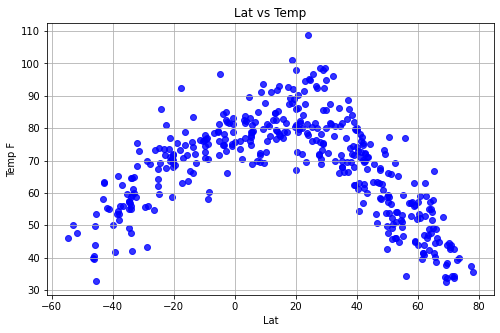

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(x=(Collected_df2['Lat']), y=(Collected_df2['Max Temp']), marker='o', facecolor= 'blue', alpha=0.8)
plt.title('Lat vs Temp')
plt.xlabel('Lat')
plt.ylabel('Temp F')
plt.grid()


## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

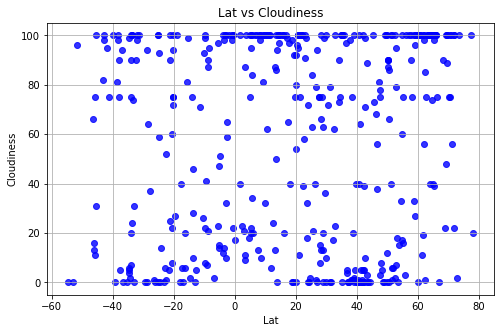

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(x=(Collected_df2['Lat']), y=(Collected_df2['Cloudiness']), marker='o', facecolor= 'blue', alpha=0.8)
plt.title('Lat vs Cloudiness')
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.grid()


## Latitude vs. Wind Speed Plot

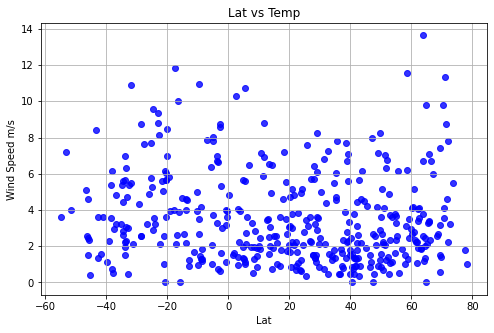

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(x=(Collected_df2['Lat']), y=(Collected_df2['Wind Speed']), marker='o', facecolor= 'blue', alpha=0.8)
plt.title('Lat vs Temp')
plt.xlabel('Lat')
plt.ylabel('Wind Speed m/s')
plt.grid()


## Linear Regression

In [14]:
Northern_hem_df = Collected_df2[Collected_df2['Lat'] >= 0]
Southern_hem_df = Collected_df2[Collected_df2['Lat'] < 0 ]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

correlation coefficient is -0.81


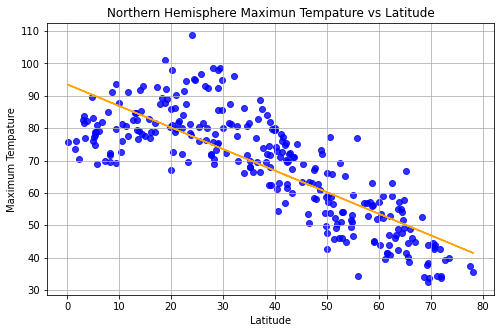

In [15]:
correlation = st.pearsonr((Northern_hem_df['Lat']),(Northern_hem_df['Max Temp']))
print(f'correlation coefficient is {round(correlation[0], 2)}')

slope, intercept, rvaule, pvaule, stderr = linregress((Northern_hem_df['Lat']), (Northern_hem_df['Max Temp']))
regression_values = (Northern_hem_df['Lat']) * slope + intercept

plt.figure(figsize=(8,5))
plt.scatter(x=(Northern_hem_df['Lat']), y=(Northern_hem_df['Max Temp']), marker='o', facecolors ='blue', alpha=0.8)
plt.plot((Northern_hem_df['Lat']), regression_values, 'orange')
plt.title('Northern Hemisphere Maximun Tempature vs Latitude')
plt.ylabel('Maximum Tempature')
plt.xlabel('Latitude')
plt.grid()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

correlation coefficient is 0.8


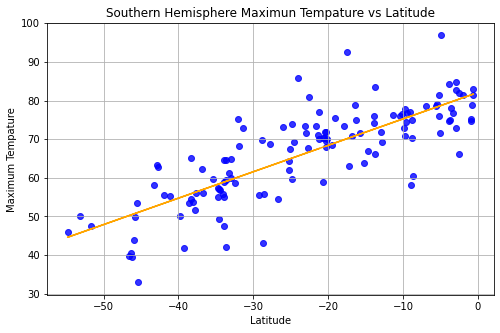

In [16]:
correlation2 = st.pearsonr((Southern_hem_df['Lat']),(Southern_hem_df['Max Temp']))
print(f'correlation coefficient is {round(correlation2[0], 2)}')

slope2, intercept2, rvaule2, pvaule2, stderr2 = linregress((Southern_hem_df['Lat']), (Southern_hem_df['Max Temp']))
regression_values2 = (Southern_hem_df['Lat']) * slope2 + intercept2

plt.figure(figsize=(8,5))
plt.scatter(x=(Southern_hem_df['Lat']), y=(Southern_hem_df['Max Temp']), marker='o', facecolors ='blue', alpha=0.8)
plt.plot((Southern_hem_df['Lat']), regression_values2, 'orange')
plt.title('Southern Hemisphere Maximun Tempature vs Latitude')
plt.ylabel('Maximum Tempature')
plt.xlabel('Latitude')
plt.grid()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

correlation coefficient is 0.14


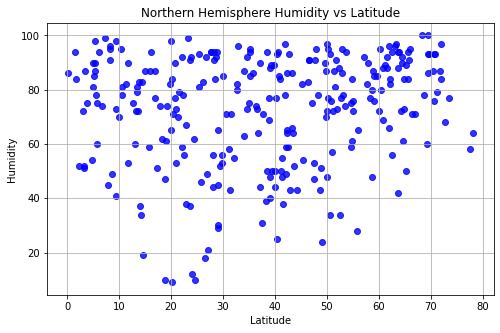

In [17]:
correlation3 = st.pearsonr((Northern_hem_df['Lat']),(Northern_hem_df['Humidity']))
print(f'correlation coefficient is {round(correlation3[0], 2)}')

#slope3, intercept3, rvaule3, pvaule3, stderr3 = linregress((Northern_hem_df['Lat']), (Northern_hem_df['Humidity']))
#regression_values = (Northern_hem_df['Lat']) * slope3 + intercept3

plt.figure(figsize=(8,5))
plt.scatter(x=(Northern_hem_df['Lat']), y=(Northern_hem_df['Humidity']), marker='o', facecolors ='blue', alpha=0.8)
#plt.plot((Northern_hem_df['Lat']), regression_values, 'orange')
plt.title('Northern Hemisphere Humidity vs Latitude')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

correlation coefficient is -0.06


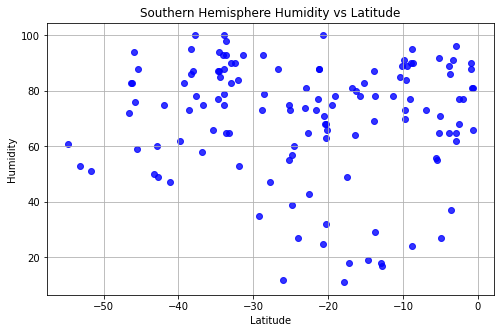

In [18]:
correlation4 = st.pearsonr((Southern_hem_df['Lat']),(Southern_hem_df['Humidity']))
print(f'correlation coefficient is {round(correlation4[0], 2)}')

#slope3, intercept3, rvaule3, pvaule3, stderr3 = linregress((Northern_hem_df['Lat']), (Northern_hem_df['Humidity']))
#regression_values = (Northern_hem_df['Lat']) * slope3 + intercept3

plt.figure(figsize=(8,5))
plt.scatter(x=(Southern_hem_df['Lat']), y=(Southern_hem_df['Humidity']), marker='o', facecolors ='blue', alpha=0.8)
#plt.plot((Northern_hem_df['Lat']), regression_values, 'orange')
plt.title('Southern Hemisphere Humidity vs Latitude')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

correlation coefficient is 0.04


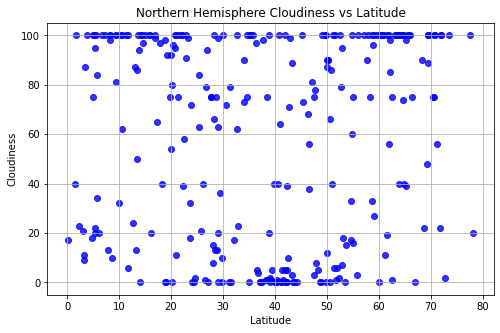

In [19]:
correlation5 = st.pearsonr((Northern_hem_df['Lat']),(Northern_hem_df['Cloudiness']))
print(f'correlation coefficient is {round(correlation5[0], 2)}')

#slope5, intercept5, rvaule5, pvaule5, stderr5 = linregress((Northern_hem_df['Lat']), (Northern_hem_df['Cloudiness']))
#regression_values5 = (Northern_hem_df['Lat']) * slope5 + intercept5

plt.figure(figsize=(8,5))
plt.scatter(x=(Northern_hem_df['Lat']), y=(Northern_hem_df['Cloudiness']), marker='o', facecolors ='blue', alpha=0.8)
#plt.plot((Northern_hem_df['Lat']), regression_values5, 'orange')
plt.title('Northern Hemisphere Cloudiness vs Latitude')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

correlation coefficient is 0.01


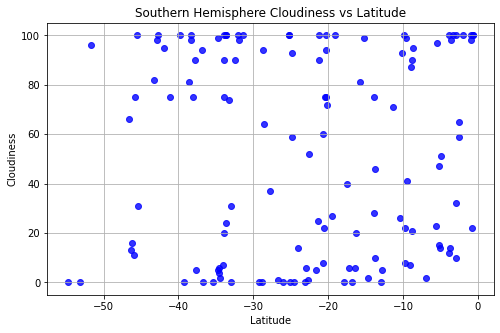

In [20]:
correlation6 = st.pearsonr((Southern_hem_df['Lat']),(Southern_hem_df['Cloudiness']))
print(f'correlation coefficient is {round(correlation6[0], 2)}')

#slope6, intercept6, rvaule6, pvaule6, stderr6 = linregress((Southern_hem_df['Lat']), (Southern_hem_df['Cloudiness']))
#regression_values5 = (Northern_hem_df['Lat']) * slope6 + intercept6

plt.figure(figsize=(8,5))
plt.scatter(x=(Southern_hem_df['Lat']), y=(Southern_hem_df['Cloudiness']), marker='o', facecolors ='blue', alpha=0.8)
#plt.plot((Northern_hem_df['Lat']), regression_values5, 'orange')
plt.title('Southern Hemisphere Cloudiness vs Latitude')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

correlation coefficient is 0.08


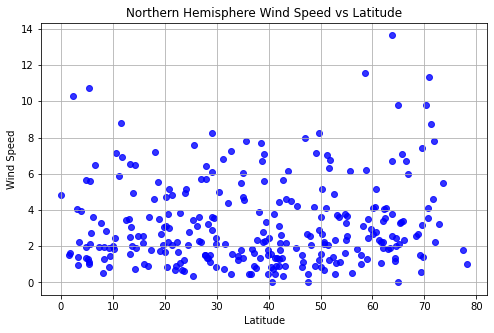

In [21]:
correlation7 = st.pearsonr((Northern_hem_df['Lat']),(Northern_hem_df['Wind Speed']))
print(f'correlation coefficient is {round(correlation7[0], 2)}')

#slope7, intercept7, rvaule7, pvaule7, stderr7 = linregress((Northern_hem_df['Lat']), (Northern_hem_df['Wind Speed']))
#regression_values7 = (Northern_hem_df['Lat']) * slope7 + intercept7

plt.figure(figsize=(8,5))
plt.scatter(x=(Northern_hem_df['Lat']), y=(Northern_hem_df['Wind Speed']), marker='o', facecolors ='blue', alpha=0.8)
#plt.plot((Northern_hem_df['Lat']), regression_values7, 'orange')
plt.title('Northern Hemisphere Wind Speed vs Latitude')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

correlation coefficient is 0.06


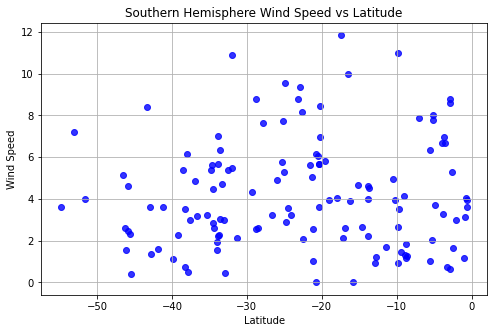

In [22]:
correlation8 = st.pearsonr((Southern_hem_df['Lat']),(Southern_hem_df['Wind Speed']))
print(f'correlation coefficient is {round(correlation8[0], 2)}')

#slope8, intercept8, rvaule8, pvaule8, stderr8 = linregress((Southern_hem_df['Lat']), (Southern_hem_df['Wind Speed']))
#regression_values8 = (Southern_hem_df['Lat']) * slope8 + intercept8

plt.figure(figsize=(8,5))
plt.scatter(x=(Southern_hem_df['Lat']), y=(Southern_hem_df['Wind Speed']), marker='o', facecolors ='blue', alpha=0.8)
#plt.plot((Southern_hem_df['Lat']), regression_values8, 'orange')
plt.title('Southern Hemisphere Wind Speed vs Latitude')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid()